In [1]:
from hdf5_getters import get_loudness
from utils import get_stat_filtered_by_years
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def get_stat_filtered_by_years(basedir, stat,ext='.h5') :
    titles = {"tape": [], "vinyl": [], "kassette": [], "cd": [], "mp3": []}
    for root, dirs, files in os.walk(basedir):
        files = glob.glob(os.path.join(root,'*'+ext))
        for f in files:
            try:
                h5 = hdf5_getters.open_h5_file_read(f)
                
                year = hdf5_getters.get_year(h5)
                
                if year < 1926:
                    continue
                elif year < 1947:
                    titles["tape"].append(stat(h5))
                elif year < 1967:
                    titles["vinyl"].append(stat(h5))
                elif year < 1981:
                    titles["kassette"].append(stat(h5))
                elif year < 1989:
                    titles["cd"].append(stat(h5))
                else: 
                    titles["mp3"].append(stat(h5))
                
                h5.close()
                
            except:
                pass
    return titles

In [3]:
loudness = get_stat_filtered_by_years("MillionSongSubset", hdf5_getters.get_loudness)

In [4]:
def showViolinPlot(data):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bpm = ax.violinplot(data, showmeans=True, showmedians=True)
    plt.show()

In [5]:
def showHistogram(data):
    # Create a figure instance
    fig = plt.figure()

    # Create an axes instance
    ax = fig.add_axes([0,0,1,1])

    # Create the boxplot
    bpm = ax.hist(data, bins=int(max(data)-min(data)))
    plt.show()

# Tape

In [6]:
pd.DataFrame(loudness["tape"]).describe()

,0
count,12.00000
mean,-18.22650
std,5.52239
min,-30.53000
25%,-20.05600
50%,-18.02450
75%,-15.09125
max,-10.69700


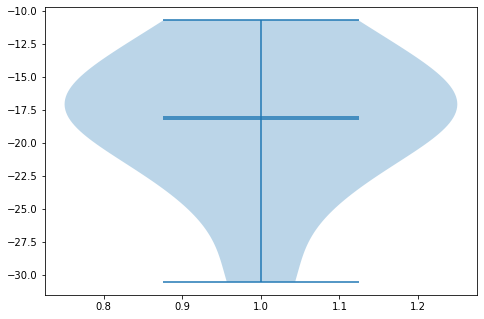

In [7]:
showViolinPlot(loudness["tape"])

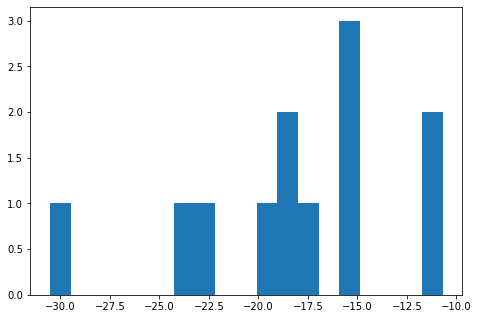

In [8]:
showHistogram(loudness["tape"])

# Vinyl

In [10]:
pd.DataFrame(loudness["vinyl"]).describe()

,0
count,62.000000
mean,-12.640903
std,5.007739
min,-26.997000
25%,-15.215250
50%,-11.632500
75%,-9.067000
max,-5.144000


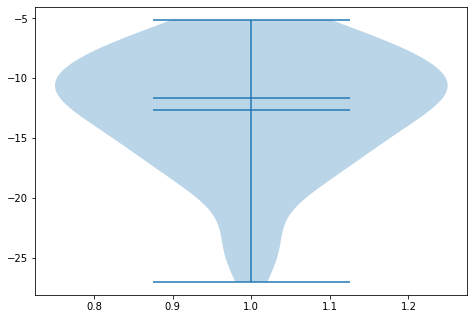

In [11]:
showViolinPlot(loudness["vinyl"])

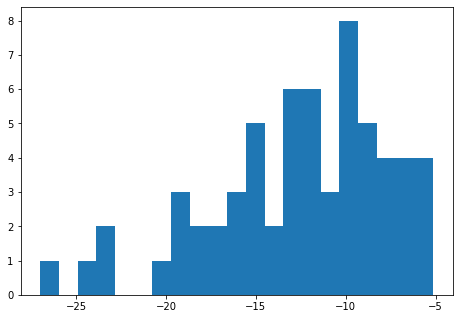

In [12]:
showHistogram(loudness["vinyl"])

# Kassette

In [14]:
pd.DataFrame(loudness["kassette"]).describe()

,0
count,260.000000
mean,-11.797669
std,4.068854
min,-27.885000
25%,-13.741750
50%,-11.666000
75%,-9.034500
max,-2.969000


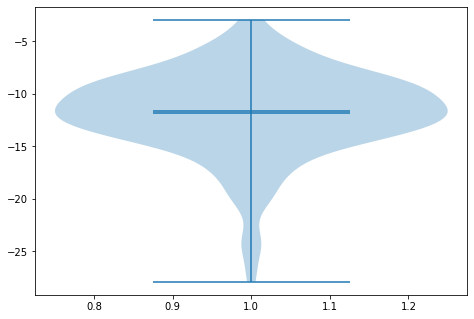

In [15]:
showViolinPlot(loudness["kassette"])

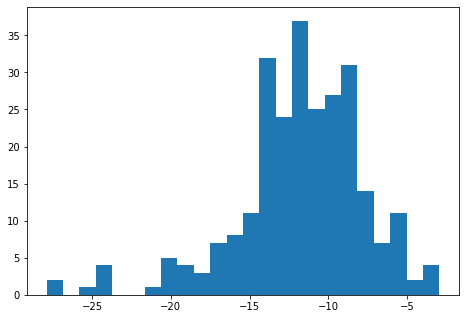

In [16]:
showHistogram(loudness["kassette"])

# CD

In [18]:
pd.DataFrame(loudness["cd"]).describe()

,0
count,249.000000
mean,-11.429526
std,5.467359
min,-38.525000
25%,-13.770000
50%,-10.762000
75%,-7.897000
max,-2.246000


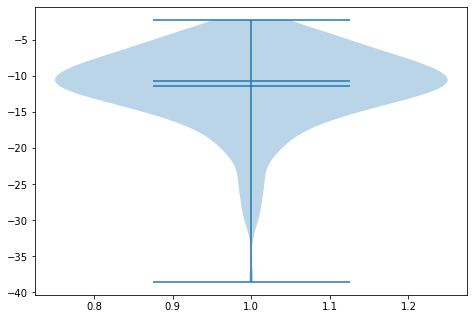

In [19]:
showViolinPlot(loudness["cd"])

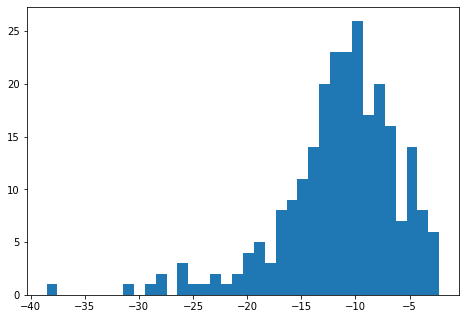

In [20]:
showHistogram(loudness["cd"])

# MP3

In [22]:
pd.DataFrame(loudness["mp3"]).describe()

,0
count,2706.000000
mean,-9.223234
std,5.032873
min,-38.148000
25%,-11.589500
50%,-7.949500
75%,-5.747000
max,0.566000


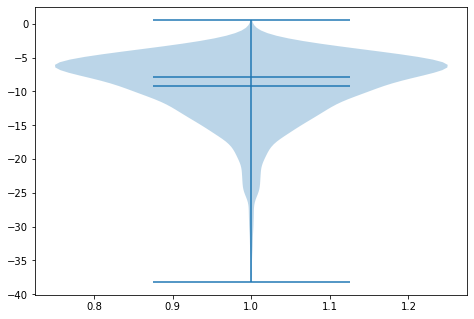

In [23]:
showViolinPlot(loudness["mp3"])

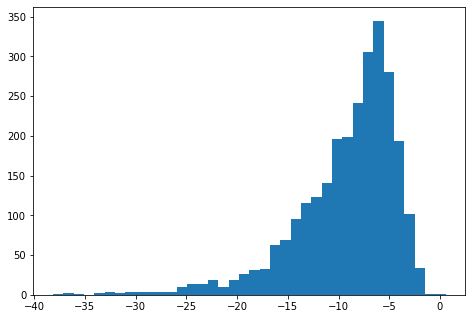

In [24]:
showHistogram(loudness["mp3"])